# Machine learning para predicción de cancer 

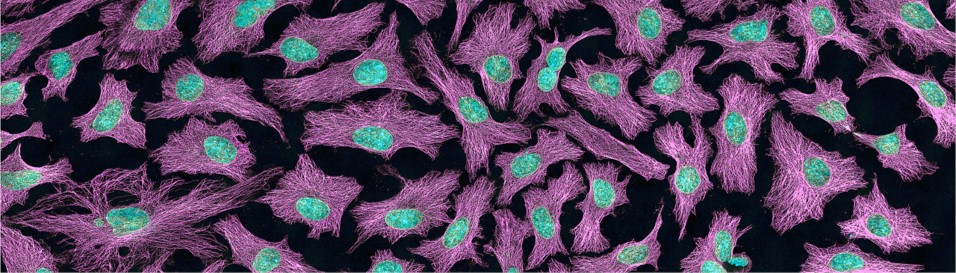

### Antecedentes

El cáncer es una enfermedad genética en la cual las células acumulan mutaciones al punto de que se replican extensivamente y sin control.  En Mexico, se estima que 14 de cada 100 mujeres mueren de cáncer. De igual manera, recibir atención médica privada para el tratamiento puede costar más de 100 mil pesos.

Del 2014 a 2018, la aseguradora GNP ha atendido más de 14,600 casos de cáncer de mama, por los cuales se ha pagado más de 2 mil millones de pesos. En lo que respecta al primer semestre de 2019, se han identificado más de 2,300 casos y se ha pagado por su atención más de 257 millones de pesos, lo que representa un costo promedio por caso de $109,375.

Por lo tanto, los avances en el diagnóstico médico temprano del cáncer de mama representan un aporte considerable para prevenir la tasa de mortalidad y el impacto económico de dicha enfermedad en México.

### Objetivo

El objetivo de este proyecto es el generar un modelo de Machine Learning que pueda identificar rápida y efectivamente células tumorales cancerígenas de células pertenecientes a tumores benignos. Como una alternativa a las pruebas genéticas tradicionales para cancer de mamá que a pesar de depender del mismo procedimiento de muestreo suelen tomar de 2 a 4 semanas en los mejores de los casos.


### Acerca del Dataset

El dataset seleccionado proviene de un repositorio de aprendizaje de machine learning de la Universidad de California. 

Este contiene las caracteristicas morfologicas de núcleos de células tumorales digitalizados (29 columnas) 
Las celulas tumorales fueron extraidas de biopsias mediante “fine needle aspirate (FNA)” y se recopilaron entre los años 1992 - 1995.



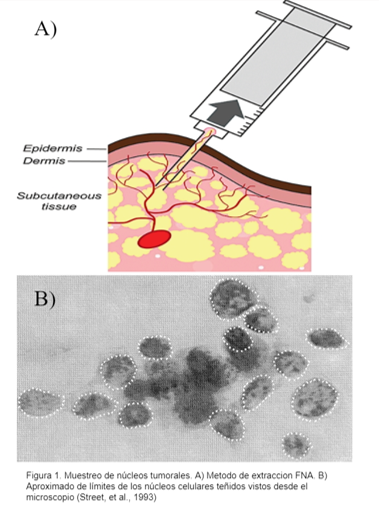

### Importamos los datos y creamos el dataframe

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('Data.csv',header=0)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Tenemos una columna vacia de nombre "Unnamed: 32"

In [8]:
## Retiramos la columna vacia
df.drop("Unnamed: 32",axis=1,inplace=True)
df.columns  ## done :D

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

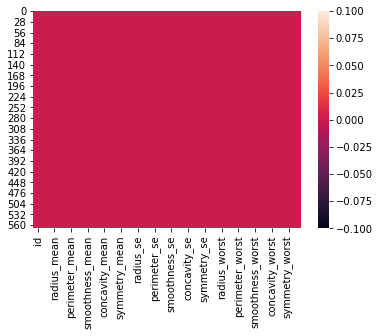

In [9]:
## Buscamos otros datos nulos
sns.heatmap(df.isnull())  ## No hay mas

Las categorias en los datos se pueden dividir en 3 categorias: Mean, SE y Worst

In [10]:
##Dividimos los datos en listas de las 3 categorias en comun
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])

La columna de Diagnóstico del tipo de cáncer (nuestro valor a predecir) cuenta con siglas en lugar de números. 

Cambiemos esto a B(benign)=0 y M(malignant)=1.

In [11]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Analisis Exploratorio de los datos (EDA)

In [12]:
df.describe()  

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


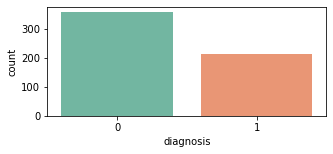

In [13]:
##  Countplot de tipos de cancer
plt.figure(figsize=(5,2))
sns.countplot(df['diagnosis'],palette='Set2')  ##La mayoria de los casos son benignos

De los 30ish parametros nesesitamos saber cuáles poseen una mayor correlación con el parámetro diagnóstico, para lo cual llevaremos a cabo un análisis de correlacion usando la función "corr" (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

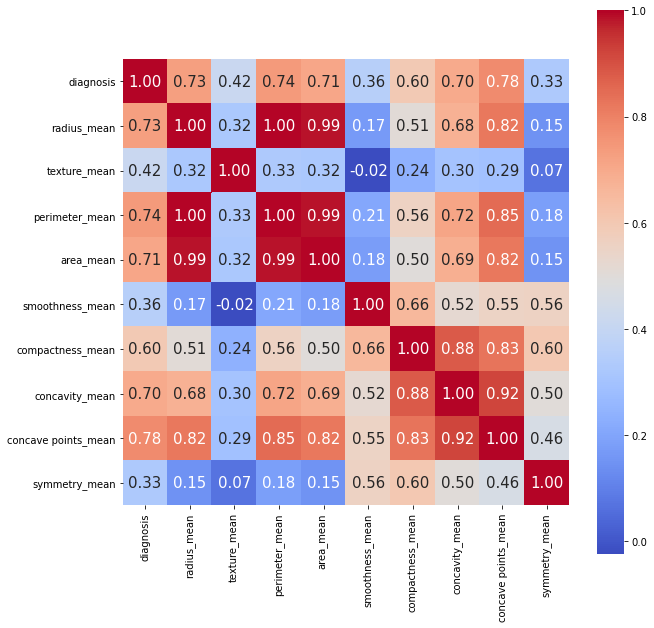

In [14]:
## Correlación entre la categoria "features_mean"
corr = df[features_mean].corr() 
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

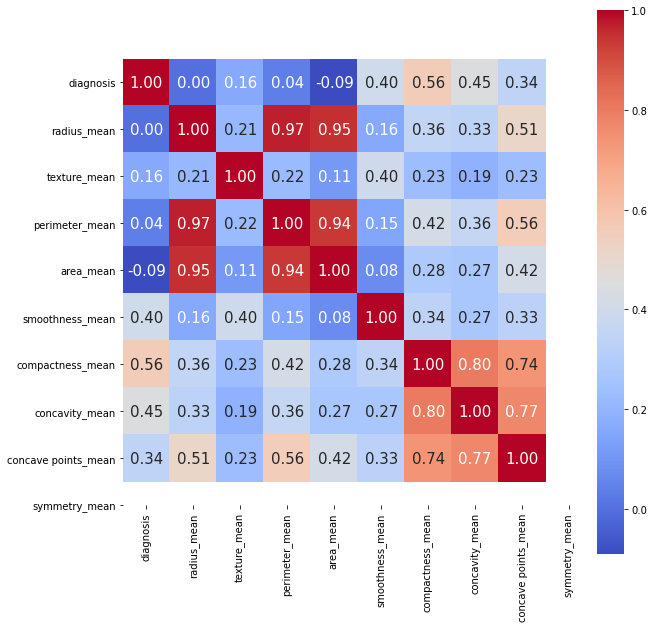

In [15]:
## Correlacion entre la categoria "features_se"
corr = df[features_se].corr() 
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

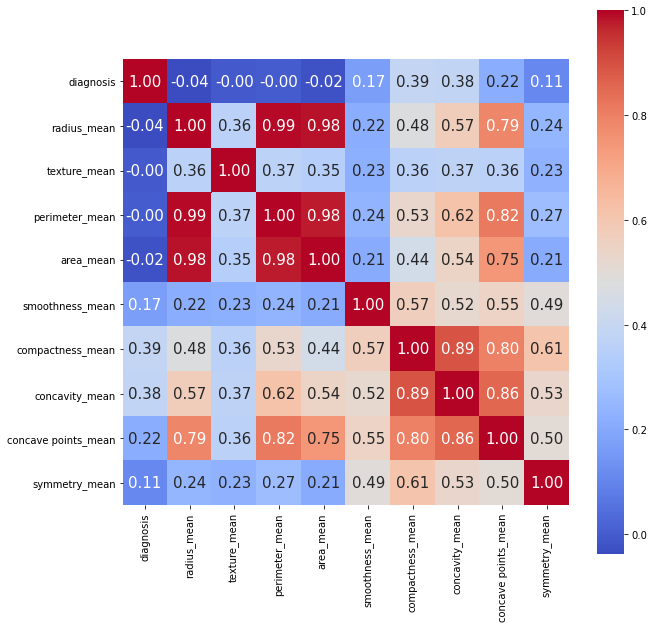

In [16]:
## Correlación entre la categoria "features_worst"
corr = df[features_worst].corr() 
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

De estos 3 análisis de correlación encontramos que la categoria "features_mean" es la que posee más parámetros con correlaciones significativas. Por lo tanto, nuestro modelo predictivo se enfocará en esta categoria.

## Predicción 

### Random forest trial

Los parámetros seleccionados de features_mean son: radius_mean, perimeter_mean, area_mean, concavity_mean, concave points_mean

In [17]:
prediction_par = ['radius_mean','perimeter_mean','area_mean','concavity_mean','concave points_mean']

In [18]:
## Import lybraries
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts

#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine

# for the check the error and accuracy of the model
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [19]:
## Split the data (for future purposes)
X = df.loc[:,df.columns!='diagnosis']
y = df.loc[:,'diagnosis']

In [20]:
X.shape,y.shape

((569, 31), (569,))

In [21]:
## Train / Test split
train, test = train_test_split(df, test_size = 0.2, random_state = 0)
print(train.shape)
print(test.shape)

(455, 32)
(114, 32)


In [22]:
train_X = train[prediction_par]
train_y=train.diagnosis
test_X= test[prediction_par] 
test_y =test.diagnosis   

In [23]:
model=RandomForestClassifier(n_estimators=100)

In [24]:
model.fit(train_X,train_y)

RandomForestClassifier()

In [25]:
prediction=model.predict(test_X)

In [26]:
print('Accuracy: ', metrics.accuracy_score(prediction,test_y)) ## Not bad, but no excellent
print('Recall: ', metrics.recall_score(prediction,test_y)) 

Accuracy:  0.9210526315789473
Recall:  0.9318181818181818


In [27]:
print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        67
           1       0.93      0.87      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [28]:
 ## Confusion matrix
pd.crosstab(prediction, test_y, rownames=['Predicción'], colnames=['Valor Real']) 

Valor Real,0,1
Predicción,,
0,64,6
1,3,41


Si bien se obtuvieron valores de accuracy y recall decentes, estos no se acercan tanto al 100% como nos gustaría, en especial considerando que se trata de una prueba diagnóstica para el área de salud. Por lo cual se tratara de probar otro modelo y mejorar el modelo implementado hasta ahora (Random forest).

### PCA (valores extremos)

In [29]:
import numpy as np
import pandas as pd

#Para navegar los archivos y tomar tiempo
import os, time

#Paquetes especiales para cargar archivos
import pickle

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette
import matplotlib as mpl

#Machine Learning
from sklearn import preprocessing as pp

#Algoritmos supervisados
from sklearn.ensemble import RandomForestClassifier

#Reducción de dimensionalidad
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.manifold import SpectralEmbedding

In [30]:
scaler_train = pp.StandardScaler(copy = True)

sstrain_x = scaler_train.fit_transform(train_X)
sstest_x = scaler_train.fit_transform(test_X)

In [31]:
ss_train_x = pd.DataFrame(data = sstrain_x)
ss_test_x = pd.DataFrame(data = sstest_x)

In [32]:
n = 5
t = time.time()
pca_train = PCA(n_components = n)

train_D = pca_train.fit_transform(ss_train_x)
test_D = pca_train.transform(ss_test_x)

componentes = ['PCA' + str(i) for i in range(n)]

train_dataframe = pd.DataFrame(data = train_D, columns = componentes)
test_dataframe = pd.DataFrame(data = test_D, columns = componentes)
print(f"This code took {time.time() - t} seconds to execute")

This code took 0.049868106842041016 seconds to execute


In [33]:
train_dataframe.head()

,PCA0,PCA1,PCA2,PCA3,PCA4
0,-2.175217,0.193107,-0.103834,0.156629,-0.013010
1,-1.917003,0.079481,0.098173,0.084405,0.003043
2,0.483051,-0.833689,-0.039440,-0.115268,0.003802
3,-1.327347,-0.206992,-0.218482,0.015152,0.007764
4,-1.526453,-0.475225,0.081989,-0.001798,-0.005698


In [34]:
sum(pca_train.explained_variance_ratio_[:1])

0.8772837091186579

In [35]:
sum(pca_train.explained_variance_ratio_[:2])

0.9855574088700856

In [36]:
sum(pca_train.explained_variance_ratio_[:3])

0.996646628579307

In [37]:
sum(pca_train.explained_variance_ratio_[:4])

0.9999013493081432

### SVM (support vector machine trial)

Generamos y entrenamos el modelo basandonos en los datos train y test previamente establecidos.

In [38]:
model2 = svm.SVC()
model2.fit(train_X,train_y)
prediction2=model2.predict(test_X)

Medimos 

In [39]:
print('Accuracy: ', metrics.accuracy_score(prediction2,test_y))  ## a little worse
print('Recall: ', metrics.recall_score(prediction2,test_y))

Accuracy:  0.8771929824561403
Recall:  0.9714285714285714


In [40]:
print(classification_report(test_y,prediction2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.90        67
           1       0.97      0.72      0.83        47

    accuracy                           0.88       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.89      0.88      0.87       114



In [41]:
 ## Confusion matrix
pd.crosstab(prediction2, test_y, rownames=['Predicción'], colnames=['Valor Real'])  ## Confusion matrix

Valor Real,0,1
Predicción,,
0,66,13
1,1,34


Este modelo, a diferencia del random forest, nos da un menor número de casos falsos positivos. Sin embargo, incrementa el numero de falsos negativos. Los cuales son una mayor preocupacion en analisis diagnosticos dirigidos al area de salud. Por lo cual descartamos el uso de este modelo para este analisis en especifico.

### Cross  - validation (Validacion cruzada)

https://scikit-learn.org/stable/modules/cross_validation.html

Se aplica únicamente a el modelo de random forest:

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit

In [32]:
cross_val_score(model,X,y,scoring='accuracy',cv=10) 

array([0.98245614, 0.85964912, 0.94736842, 0.96491228, 0.98245614,
       0.98245614, 0.96491228, 0.98245614, 0.94736842, 1.        ])

In [33]:
cvals = cross_validate(model,X,y,cv=10,scoring='accuracy')

In [38]:
dfcvals=pd.DataFrame(cvals) 

dfcvals

,fit_time,score_time,test_score
0,0.376912,0.020481,0.982456
1,0.400120,0.022164,0.912281
2,0.419024,0.017912,0.912281
3,0.358827,0.020021,0.929825
4,0.419986,0.027962,0.982456
5,0.353242,0.010604,0.982456
6,0.396200,0.014773,0.964912
7,0.402086,0.017562,0.982456
8,0.423363,0.029693,0.947368
9,0.427379,0.022519,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

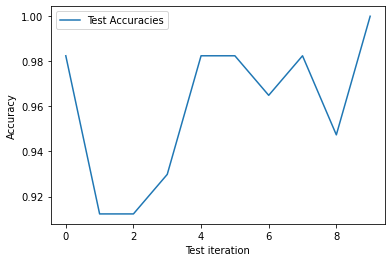

In [45]:
plt.plot(dfcvals.index, dfcvals['test_score'], label = 'Test Accuracies')
plt.legend()
plt.xlabel('Test iteration')
plt.ylabel('Accuracy')
plt.show

In [44]:
cvmean=dfcvals['test_score'].mean
print(cvmean)## Mean accuracy of all model variations

<bound method Series.mean of 0    0.982456
1    0.912281
2    0.912281
3    0.929825
4    0.982456
5    0.982456
6    0.964912
7    0.982456
8    0.947368
9    1.000000
Name: test_score, dtype: float64>


La iteraciones 4, 5 y 7 dieron el mejor resultado en cuanto a accuracy, considerando que la iteracion 10 se descarta debido a que es muy complicado tener un accuracy del 100% sin que el modelo caiga en overfiting. 

### Conclusiones

Se logró generar y optimizar un modelo capaz de diferenciar las características morfológicas de un nucleo celular de una célula cancerígena en comparacion a una célula de un tumor benigno, con el fin de ser una alternativa rápida a los medios de diagnstico tradicionales.


Sources:

Wolberg, W.,  Street N., Wolberg, O. (1995). Breast Cancer Wisconsin (Diagnostic) Data Set. UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29]. Irvine, CA: University of California, School of Information and Computer Science.  

Street, W. N., Wolberg, W. H., & Mangasarian, O. L. (1993, July). Nuclear feature extraction for breast tumor diagnosis. In Biomedical image processing and biomedical visualization (Vol. 1905, pp. 861-870). International Society for Optics and Photonics.

Forbes(2019).¿Cuánto cuesta atender el cáncer de mama?. Retrieved from: https://www.forbes.com.mx/cuanto-cuesta-atender-el-cancer-de-mama/
